# Test of boundary condition in fully Convective simulation

Here we compare two FC simulations with different boundary conditions

In [23]:
# Define paths of simulations to be compared
WORK_DIR = "/Volumes/LaCie/Simulations/mhd/"
PATH1 = WORK_DIR + "Nr15Ek5Ra7dS200Pm5-FC_bs_init0"    # Simulation with boundary condition S
PATH2 = WORK_DIR + "Nr15Ek5Ra7dS200Pm5-FC_bdsdr_init0" # Simulation with boundary condition ds/dr

In [39]:
# Read simulations' data
os.chdir(PATH1)
ts1 = MagicTs(field='par', all=True, iplot=False)
os.chdir(PATH2)
ts2 = MagicTs(field='par', all=True, iplot=False)

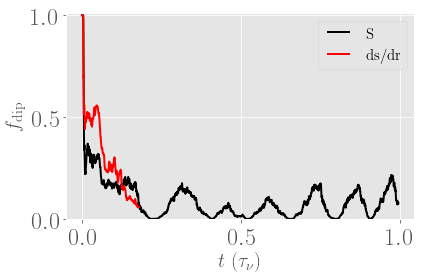

In [40]:
it1 = ts1.time.argsort()
it2 = ts2.time.argsort()
plt.plot(ts1.time[it1], ts1.dip_cmb[it1], 'k', label=r'S')
plt.plot(ts2.time[it2], ts2.dip_cmb[it2], 'r', label=r'ds/dr')
plt.ylabel(r'$f_\mathrm{dip}$', fontsize=20)
plt.xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
plt.ylim((0.,1.01))
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()


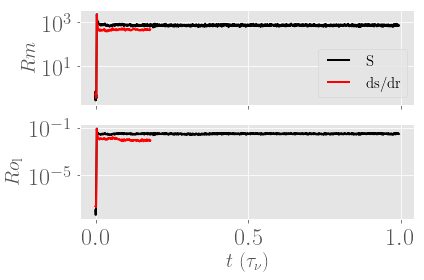

In [41]:
fig, ax = plt.subplots(2, sharex=True)
it1 = ts1.time.argsort()
it2 = ts2.time.argsort()
ax[0].plot(ts1.time[it1], ts1.rm[it1], 'k', label=r'S')
ax[0].plot(ts2.time[it2], ts2.rm[it2], 'r', label=r'ds/dr')
ax[1].plot(ts1.time[it1], ts1.rolc[it1], 'k')
ax[1].plot(ts2.time[it2], ts2.rolc[it2], 'r')
ax[0].set_ylabel(r'$Rm$', fontsize=20)
ax[1].set_ylabel(r'$Ro_\mathrm{l}$', fontsize=20)
plt.xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend(fontsize=15)
plt.tight_layout()
plt.show()

In [42]:
# Read simulations' data
os.chdir(PATH1)
ts1 = MagicTs(field='e_mag_oc', all=True, iplot=False)
os.chdir(PATH2)
ts2 = MagicTs(field='e_mag_oc', all=True, iplot=False)

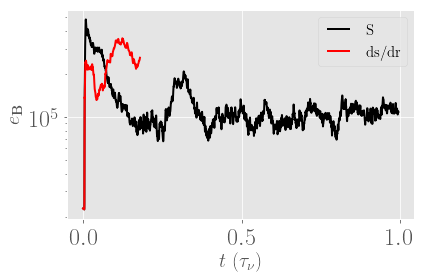

In [43]:
it1 = ts1.time.argsort()
it2 = ts2.time.argsort()
plt.plot(ts1.time[it1], ts1.emag_tot[it1], 'k', label=r'S')
plt.plot(ts2.time[it2], ts2.emag_tot[it2], 'r', label=r'ds/dr')
plt.ylabel(r'$e_\mathbf{B}$', fontsize=20)
plt.xlabel(r'$t \; (\tau_\nu)$', fontsize=20)
plt.yscale('log')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()